<a href="https://colab.research.google.com/github/vinodgaitonde/ProjIdeas/blob/main/WordPredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required packages

In [2]:
import numpy as np
import re
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

# Read Data

In [3]:
with open('./sample_data/1661-split.txt', 'r') as f:
    text = f.read().lower()
print('corpus length:', len(text))
print(text[:100])

corpus length: 282300
﻿
project gutenberg's the adventures of sherlock holmes, by arthur conan doyle

this ebook is for th


# Split the dataset

In [4]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

print(len(words))
print(words[:100])

53047
['project', 'gutenberg', 's', 'the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'arthur', 'conan', 'doyle', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www', 'gutenberg', 'net', 'title', 'the', 'adventures', 'of', 'sherlock', 'holmes', 'author', 'arthur', 'conan', 'doyle', 'release', 'date', 'november', '29', '2002', 'ebook', '1661', 'last', 'updated', 'may', '20', '2019', 'language', 'english', 'character', 'set', 'encoding', 'utf', '8', 'start', 'of', 'this', 'project', 'gutenberg', 'ebook', 'the', 'adventures', 'of', 'sherlock', 'holmes', 'produced']


# Unique Words

In [5]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

print(unique_words)

['000' '10' '1000' ... 'zealand' 'zero' 'œuvre']


Define a Word length which will represent the number of previous words that will determine our next word.
Define prev words to keep five previous words and their corresponding next words in the list of next words.

In [6]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


Create two numpy arrays X for storing the features and Y for storing its corresponding label.

In [7]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

print(X[0][0])

[False False False ... False False False]


# Building the Recurrent Neural network

Use the Recurrent Neural Networks for next word prediction model.
Here we will use the LSTM model, which is a very powerful RNN

In [8]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training the Next Word Prediction Model

In [9]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=45, shuffle=True).history

Epoch 1/45
394/394 ━━━━━━━━━━━━━━━━━━━━ 101s 251ms/step - accuracy: 0.0484 - loss: 6.6991 - val_accuracy: 0.0893 - val_loss: 6.1533
Epoch 2/45
394/394 ━━━━━━━━━━━━━━━━━━━━ 142s 252ms/step - accuracy: 0.0951 - loss: 5.9688 - val_accuracy: 0.1150 - val_loss: 5.8694
Epoch 3/45
394/394 ━━━━━━━━━━━━━━━━━━━━ 140s 248ms/step - accuracy: 0.1248 - loss: 5.6190 - val_accuracy: 0.1255 - val_loss: 5.7385
Epoch 4/45
394/394 ━━━━━━━━━━━━━━━━━━━━ 142s 250ms/step - accuracy: 0.1348 - loss: 5.3957 - val_accuracy: 0.1289 - val_loss: 5.7311
Epoch 5/45
394/394 ━━━━━━━━━━━━━━━━━━━━ 100s 253ms/step - accuracy: 0.1560 - loss: 5.1484 - val_accuracy: 0.1210 - val_loss: 5.7214
Epoch 6/45
394/394 ━━━━━━━━━━━━━━━━━━━━ 141s 252ms/step - accuracy: 0.1792 - loss: 4.8499 - val_accuracy: 0.1210 - val_loss: 5.7701
Epoch 7/45
394/394 ━━━━━━━━━━━━━━━━━━━━ 140s 247ms/step - accuracy: 0.2108 - loss: 4.5381 - val_accuracy: 0.1229 - val_loss: 5.7940
Epoch 8/45
394/394 ━━━━━━━━━━━━━━━━━━━━ 98s 249ms/step - accuracy: 0.2514 - 

Save the model

In [10]:
model.save('grp10_nextWord_1.keras')
pickle.dump(history, open("history.p", "wb"))
model = load_model('grp10_nextWord_1.keras')
history = pickle.load(open("history.p", "rb"))

# Evaluate the model

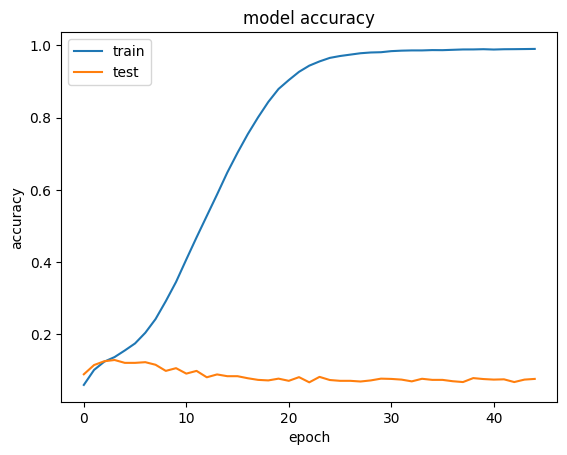

In [11]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

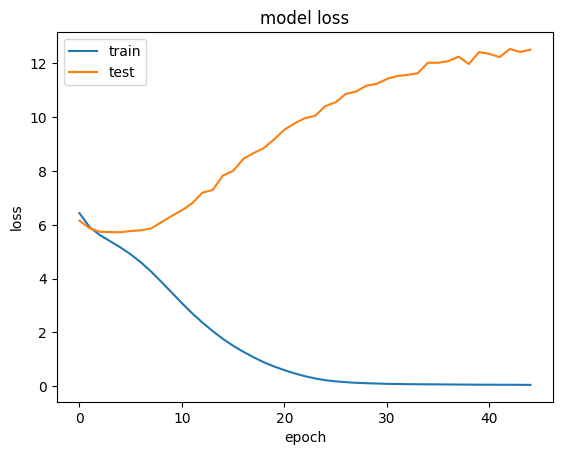

In [12]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Next word prediction

In [13]:
def prepare_input(text):
    # Convert text to lowercase and tokenize
    words = tokenizer.tokenize(text.lower())
    # Get the last WORD_LENGTH words
    input_words = words[-WORD_LENGTH:]
    # Create an empty input array with the same shape as used during training
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    # Encode the input words using the unique word index
    for i, word in enumerate(input_words):
        if word in unique_word_index:
            x[0, i, unique_word_index[word]] = 1
    return x

Some text for testing

In [14]:
quotes = [
    "It is not a lack of love but a lack of friendship that makes unhappy marriages.",
    "That which does not kill us makes us stronger.",
    "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
    "And those who were seen dancing were thought to be insane by those who could not hear the music.",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

# Test Model

In [15]:
def predict_next_word(text):

    # Prepare the input text
    x = prepare_input(text)
    # Use the model to make a prediction
    preds = model.predict(x, verbose=0)[0]
    # Get the index of the word with the highest probability
    next_index = np.argmax(preds)
    # Get the actual word from the unique word index
    next_word = unique_words[next_index]
    return next_word


def predict_next_words(text, num_words=5):
    # Prepare the input text
    x = prepare_input(text)
    # Use the model to make a prediction
    preds = model.predict(x, verbose=0)[0]
    # Get the indices of the top num_words most likely words
    top_indices = heapq.nlargest(num_words, range(len(preds)), preds.take)
    # Get the corresponding words from the unique word index
    predicted_words = [unique_words[i] for i in top_indices]
    return predicted_words

In [16]:
# Example usage:
input_text = "the quick brown fox"
next_word = predict_next_word(input_text)
print(f"Input Text: {input_text}")
print(f"Predicted Next Word: {next_word}")

# Example usage:
input_text = "the quick brown fox"
predicted_words = predict_next_words(input_text, num_words=5)
print(f"Input Text: {input_text}")
print(f"Predicted Next Words: {predicted_words}")

Input Text: the quick brown fox
Predicted Next Word: reply
Input Text: the quick brown fox
Predicted Next Words: ['reply', 'from', 'voices', 'sheet', 'four']


In [17]:
for q in quotes:
    seq = q[:40].lower()
    predicted_words = predict_next_words(seq)
    print(f"Input Text: {seq}")
    print(f"Predicted Next Words: {predicted_words}\n")

Input Text: it is not a lack of love but a lack of f
Predicted Next Words: ['in', 'who', 'locked', 'natural', 'on']

Input Text: that which does not kill us makes us str
Predicted Next Words: ['a', 'as', 'from', 'on', 'is']

Input Text: i'm not upset that you lied to me, i'm u
Predicted Next Words: ['whether', 'belt', 'heart', 'invisible', 'income']

Input Text: and those who were seen dancing were tho
Predicted Next Words: ['in', 'a', 'they', 'black', 'to']

Input Text: it is hard enough to remember my opinion
Predicted Next Words: ['i', 'we', 'and', 'which', 's']

